In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge

# Линейная регрессия и ее проявления

In [ ]:
class MyLinearRegression:

  def __init__(self, bias_exist=True):
    self.bias_exist = bias_exist  # элемент сдвига, т.е. b в формуле y = ax + b, значение True утверждает, что он есть, значение False, что его нет


  def fit(self, X, y_true):  # Принимает на вход матрицу фичей и наблюдений Х и вектор правильных ответов у_true и вычисляет веса w

    n, k = X.shape  # Тут n - число наблюдений, k - количество фичей (признаков)

    X_train = np.hstack((X, np.ones((n, 1)))) if self.bias_exist else X
    # X_train = X
    # if self.bias_exist:
    #   X_train = np.hstack((X, np.ones((n, 1))))  # Если сдвиг есть, то мы добавляем вектор-столбец длины n, состоящий из 1, к нашему Х

    # Функция потерь MSE: L = \Sigma (x_i * w - y_i)^2 ===> запись в матричном виде: (Xw - y).T (Xw - y) ===>  минимизируем ее, значит берем производную
    # Получаем dL/dw = 2 X.T (Xw - y) ===> приравниваем к 0 и выражаем w ===> w = (X.T X)^(-1) X.T y
    self.w = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_true

    return self


  def predict(self, X):  # Принимает на вход матрицу фичей и наблюдений Х и вычисляет у_pred

    n, k = X.shape

    X_train = np.hstack((X, np.ones((n, 1)))) if self.bias_exist else X
    # X_train = X
    # if self.bias_exist:
    #   X_train = np.hstack((X, np.ones((n, 1))))

    y_pred = X_train @ self.w

    return y_pred


  def get_weights(self):  # Возвращает вычисленные веса функции
        return self.w

In [ ]:
def RealFunc(x):  # Это наша действительная зависимость, реальная функция как она есть
  return 6 * x + 2

In [ ]:
# Создаем свою выборку из object_num точек

object_num = 100  # Количество точек
X = np.linspace(-10, 10, object_num)  # Будет всего одна фича т.е. пространство 2D
y = RealFunc(X) + np.random.randn(object_num) * 8

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

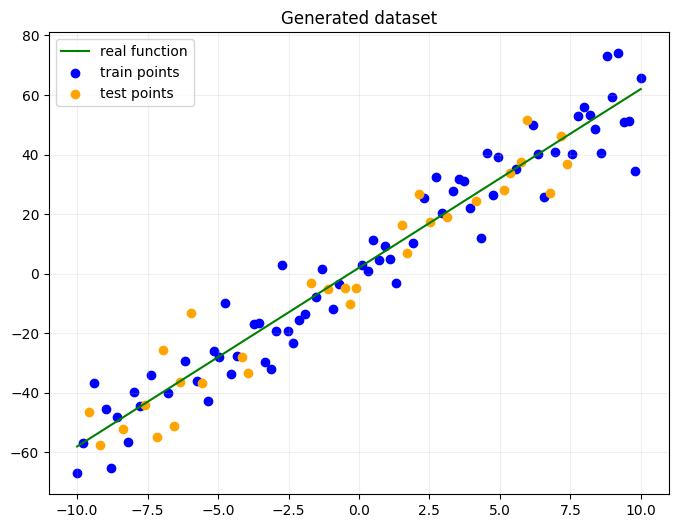

In [ ]:
# Строим график как выглядит наш сгенерированный датасет и любуемся красотой

plt.figure(figsize=(8, 6))
plt.plot(X, RealFunc(X), label='real function', c='g')
plt.scatter(X_train, y_train, label='train points', c='b')
plt.scatter(X_test, y_test, label='test points', c='orange')

plt.title("Generated dataset")
plt.grid(alpha=0.2)
plt.legend()
plt.show()

In [ ]:
# Создадим объект класса МояРегрессия и обучим его на наших данных

regressor = MyLinearRegression()
regressor.fit(X_train[:, np.newaxis], y_train)  # Изначально X_train был создан размерности 1D, а у нас все работает для 2D, так что добавили размерность фейковую
y_predicted = regressor.predict(X_train[:, np.newaxis])

w = regressor.get_weights()
w

array([5.99674132, 1.58026198])

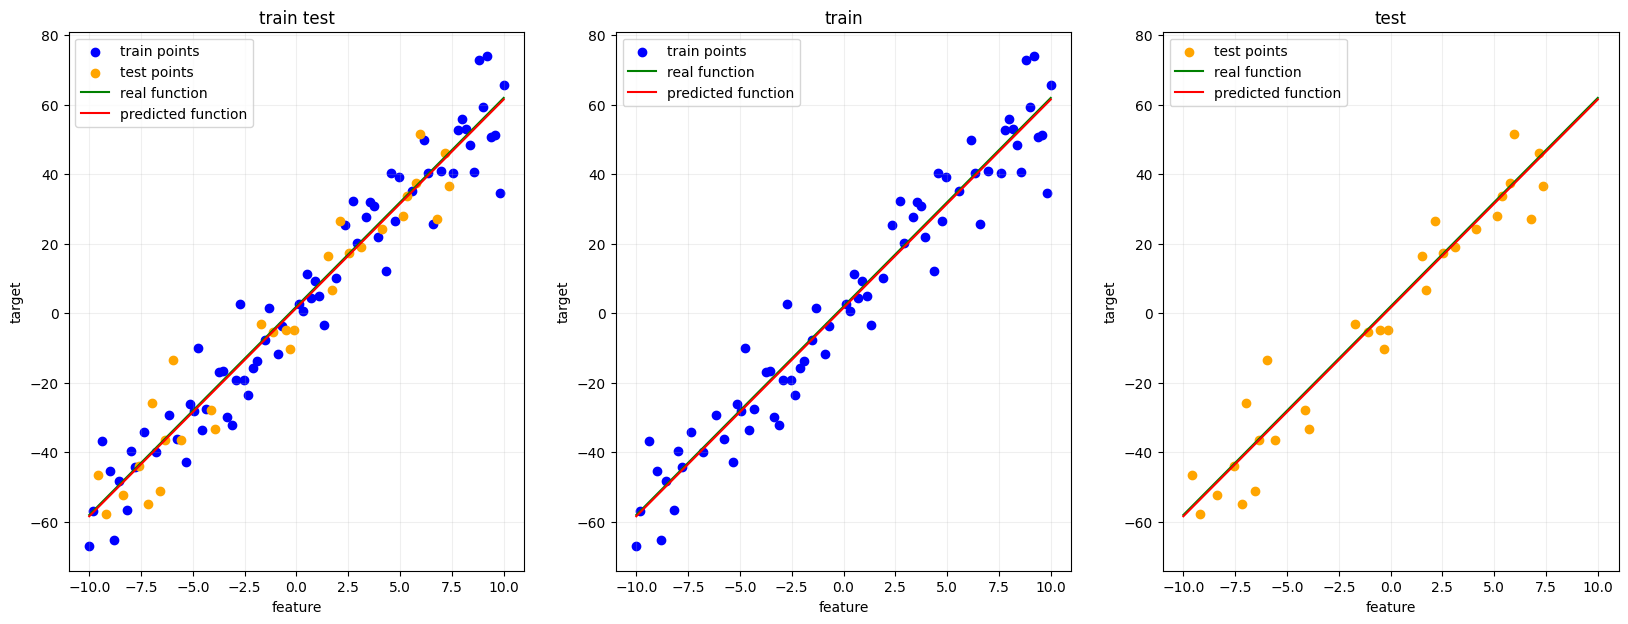

In [ ]:
# Строим графики и смотрим, как оно все там напредсказывалось

plt.figure(figsize=(20, 7))

ax = None

for i, types in enumerate([['train', 'test'], ['train'], ['test']]):
    ax = plt.subplot(1, 3, i + 1, sharey=ax)
    if 'train' in types:
        plt.scatter(X_train, y_train, label='train points', c='b')
    if 'test' in types:
        plt.scatter(X_test, y_test, label='test points', c='orange')

    plt.plot(X, RealFunc(X), label='real function', c='g')
    plt.plot(X, regressor.predict(X[:, np.newaxis]), label='predicted function', c='r')

    plt.ylabel('target')
    plt.xlabel('feature')
    plt.title(" ".join(types))
    plt.grid(alpha=0.2)
    plt.legend()

plt.show()

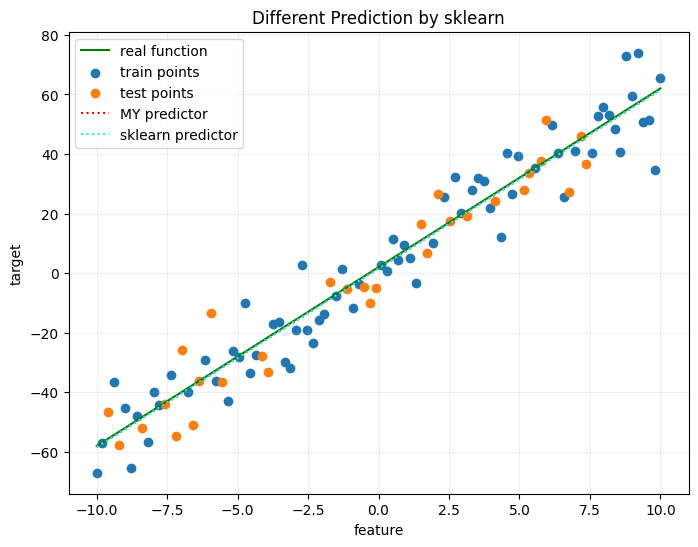

In [ ]:
# А теперь построим регрессию "из коробки", т.е. просто заюзаем готовую из пакета sklearn

sk_reg = LinearRegression().fit(X_train[:, np.newaxis], y_train)

plt.figure(figsize=(8, 6))
plt.plot(X, RealFunc(X), label='real function', c='g')

plt.scatter(X_train, y_train, label='train points')
plt.scatter(X_test, y_test, label='test points')
plt.plot(X, regressor.predict(X[:, np.newaxis]), label='MY predictor', c='r', linestyle=':')
plt.plot(X, sk_reg.predict(X[:, np.newaxis]), label='sklearn predictor', c='cyan', linestyle=':')

plt.title("Different Prediction by sklearn")
plt.ylabel('target')
plt.xlabel('feature')
plt.grid(alpha=0.2)
plt.legend()
plt.show()

In [ ]:
# Посчитаем среднеквадратичную ошибку у нашего предиктора

train_predictions = regressor.predict(X_train[:, np.newaxis])
test_predictions = regressor.predict(X_test[:, np.newaxis])

print('Train MSE: ', mean_squared_error(y_train, train_predictions))
print('Test MSE: ', mean_squared_error(y_test, test_predictions))

Train MSE:  81.56842822875903
Test MSE:  73.87384003310633


In [ ]:
# Посчитаем среднеквадратичную ошибку у предиктора из sklearn

train_predictions_sklearn = sk_reg.predict(X_train[:, np.newaxis])
test_predictions_sklearn = sk_reg.predict(X_test[:, np.newaxis])

print('Train MSE: ', mean_squared_error(y_train, train_predictions))
print('Test MSE: ', mean_squared_error(y_test, test_predictions))

Train MSE:  81.56842822875903
Test MSE:  73.87384003310633


Обращение матрицы -- очень долгая операция. Кроме того, обратная матрица $(X^TX)^{-1}$ не всегда существует. По этим причинам, мы воспользуемся методом градиентного спуска для оптимизации эмпирического риска.

Градиентый спуск заключается в
1. расчете $\displaystyle\frac{\partial{L}}{\partial{w}}$ -- градиента ошибки (значение целевой функции, то есть лосса $L(y_{pred}, y_{true})$) от значения параметров модели (весов $w$)
2. шаге спуска -- изменении весов $w$ в сторону антиградиента с некоторым коэффициентом $h$ (он же learning rate):
$$w := w - h\frac{\partial{L}}{\partial{w}}$$
3. Повторении п.1 и п.2 пока не наблюдается сходимость (изменения ошибки малы или отсутствуют)

Как правило, чаще используют стохастический градиентный спуск (SGD): выбирают случайный элемент обучающей выборки и изменяют коэффициенты модели по направлению антиградиента функции потерь на этом примере.

In [ ]:
# Теперь реализация линейной регрессии, но через градиентный спуск

class MyGradientLinearRegression(MyLinearRegression):
    def __init__(self, **kwargs):
        super().__init__(**kwargs) # передает именные параметры родительскому конструктору
        self.w = None

    def fit(self, X, y, learning_rate=0.01, max_iter=100):
        # Принимает на вход X, y и вычисляет веса по данной выборке

        n, k = X.shape

        # случайно инициализируем веса
        if self.w is None:
            self.w = np.random.randn(k + 1 if self.bias_exist else k)

        X_train = np.hstack((X, np.ones((n, 1)))) if self.bias_exist else X

        self.losses = []

        for iter_num in range(max_iter):
            y_pred = self.predict(X)
            self.losses.append(mean_squared_error(y_pred, y))

            grad = self._calc_gradient(X_train, y, y_pred)

            assert grad.shape == self.w.shape, f"gradient shape {grad.shape} is not equal weight shape {self.w.shape}"
            self.w -= learning_rate * grad

        return self

    def _calc_gradient(self, X, y, y_pred):
        grad = 2 * (y_pred - y)[:, np.newaxis] * X
        grad = grad.mean(axis=0)
        return grad

    def get_losses(self):
        return self.losses

In [ ]:
# А теперь обучим такой вид линейной регрессии на тех же данных

regressor = MyGradientLinearRegression()

l = regressor.fit(X_train[:, np.newaxis], y_train, max_iter=100).get_losses()

predictions = regressor.predict(X_test[:, np.newaxis])

w = regressor.get_weights()

w

array([6.00111507, 1.18015643])

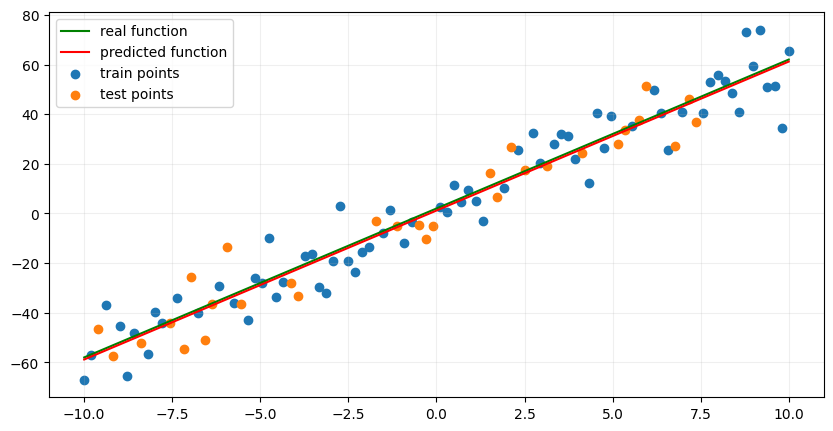

In [ ]:
# Строим график предсказания от линейной регрессии на градиентном спуске

plt.figure(figsize=(10, 5))

plt.plot(X, RealFunc(X), label='real function', c='g')
plt.plot(X, regressor.predict(X[:, np.newaxis]), label='predicted function', c='r')

plt.scatter(X_train, y_train, label='train points')
plt.scatter(X_test, y_test, label='test points')


plt.grid(alpha=0.2)
plt.legend()
plt.show()

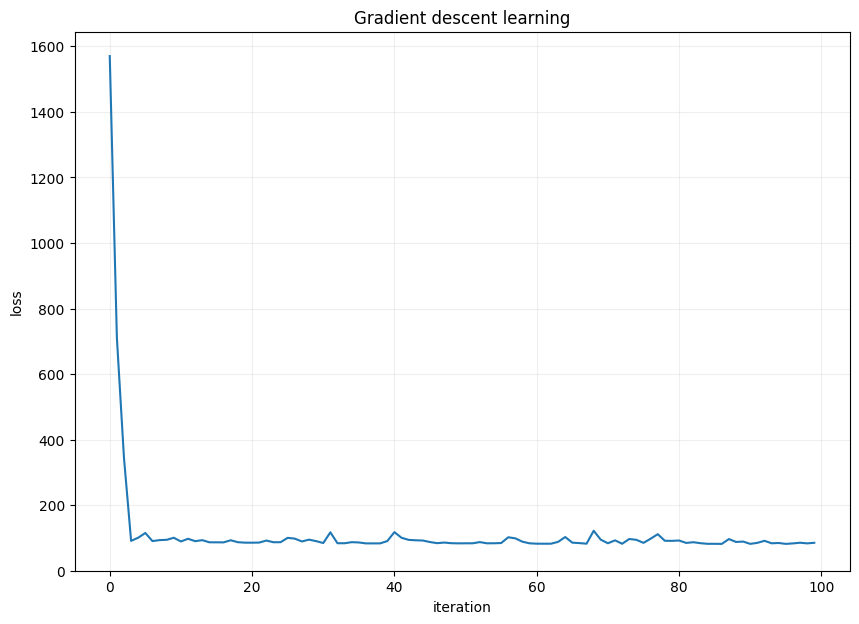

In [ ]:
# Интересно еще посмотреть, как с зодом обучения менялся лосс

plt.figure(figsize=(10, 7))

plt.plot(l)

plt.title('Gradient descent learning')
plt.ylabel('loss')
plt.xlabel('iteration')
plt.ylim(bottom=0)
plt.grid(alpha=0.2)

plt.show()

In [ ]:
# Считать градиент по всей выборке - это очень долго, можем считать по подвыборкам небольшого размера и все равно получать хороший результат, но быстрее!

class MySGDLinearRegression(MyGradientLinearRegression):
    def __init__(self, n_sample=10, **kwargs):
        super().__init__(**kwargs) # передает именные параметры родительскому конструктору
        self.w = None
        self.n_sample = n_sample

    def _calc_gradient(self, X, y, y_pred):
        # Главное отличие в SGD - это использование подвыборки для шага оптимизации
        inds = np.random.choice(np.arange(X.shape[0]), size=self.n_sample, replace=False)  # т.е. рандомно берем n_sample индексов без повторений в промежутке от 0 до n

        grad = 2 * (y_pred[inds] - y[inds])[:, np.newaxis] * X[inds]
        grad = grad.mean(axis=0)

        return grad

In [ ]:
#  Теперь можем на старых данных научить такой вид линейной регрессии

regressor = MySGDLinearRegression()

l = regressor.fit(X_train[:, np.newaxis], y_train, max_iter=100).get_losses()

predictions = regressor.predict(X_test[:, np.newaxis])

w = regressor.get_weights()
w

array([6.45371752, 0.91481558])

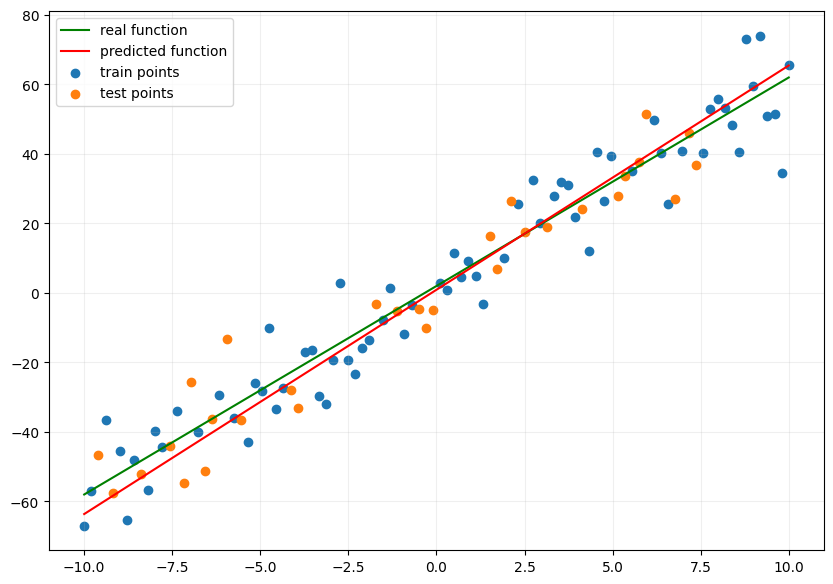

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(X, RealFunc(X), label='real function', c='g')
plt.plot(X, regressor.predict(X[:, np.newaxis]), label='predicted function', c='r')

plt.scatter(X_train, y_train, label='train points')
plt.scatter(X_test, y_test, label='test points')


plt.grid(alpha=0.2)
plt.legend()
plt.show()

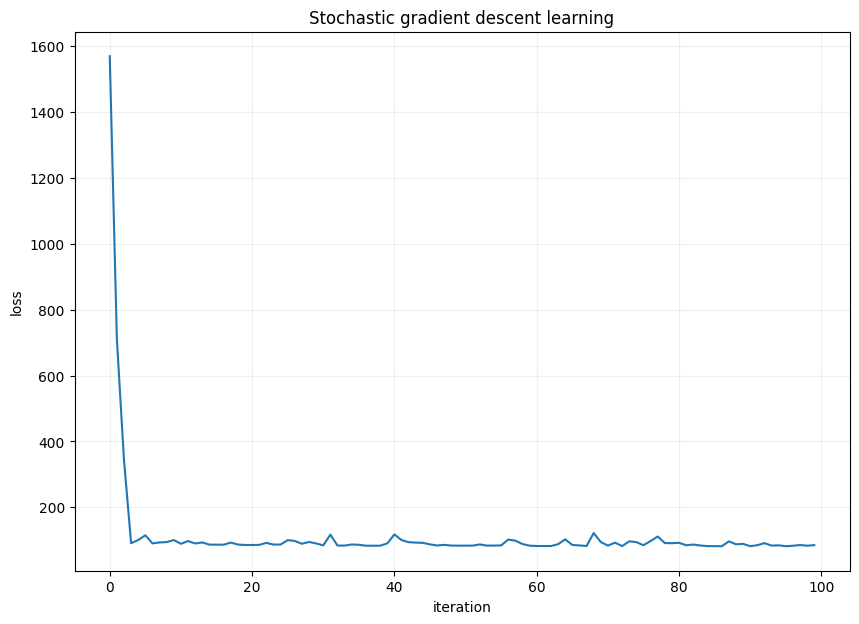

In [ ]:
# Теперь посмотрим, а как в случае мини-бачей меняется лосс

plt.figure(figsize=(10, 7))

plt.plot(l)

plt.title('Stochastic gradient descent learning')
plt.ylabel('loss')
plt.xlabel('iteration')
plt.grid(alpha=0.2)
plt.show()

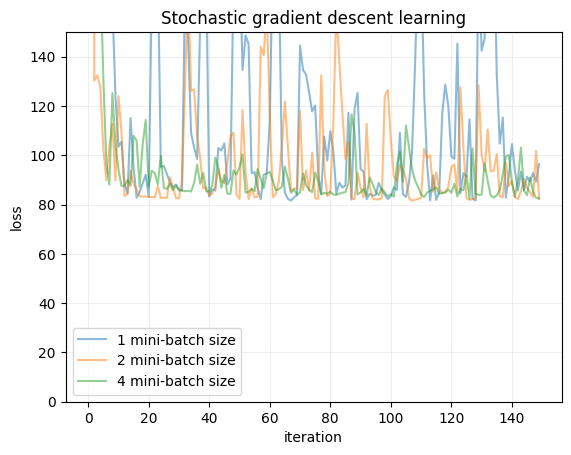

In [ ]:
# Ради интереса можно посмотреть, а как выглядят лоссы для разного размера бачей?

n_samples = [1, 2, 4]

for sample_size in n_samples:
  loss = MySGDLinearRegression(n_sample=sample_size).fit(X_train[:, np.newaxis], y_train, learning_rate=5e-3, max_iter=150).get_losses()
  plt.plot(loss, alpha=0.5, label=f'{sample_size} mini-batch size')

plt.title('Stochastic gradient descent learning')
plt.ylabel('loss')
plt.xlabel('iteration')

plt.legend()
plt.ylim((0, 150))
plt.grid(alpha=0.2)
plt.show()

# Логистическая регрессия и с чем ее едят

Задача теперь формулируется так:

**Предсказания:** $$
y_{pred}(x, w) = \frac{1}{1 + e^{-\langle x, w \rangle}}
$$

**Лосс (LogLoss):** $$
L(w) = -y\, log\,y_{pred} - (1-y)\,log\,(1-y_{pred})
$$

**Градиент:**
$$
\frac{\partial{L}}{\partial{w}}
= \left(-\frac{y}{y_{pred}} + \frac{1-y}{1-y_{pred}}\right)\frac{\partial{y_{pred}}}{\partial{w}}
$$

$$
\frac{\partial{y_{pred}}}{\partial{w}} = \frac{1}{(1+e^{-\langle x, w \rangle})^2} e^{-\langle x, w \rangle} (-x) = -y_{pred}(1-y_{pred})x
$$

$$
\frac{\partial{L}}{\partial{w}} = (y_{pred} - y) x
$$

In [ ]:
def logit(x, w):
    return np.dot(x, w)  # По сути - обычная линейная регрессия

def sigmoid(h):
    return 1. / (1 + np.exp(-h))  # Собственно сам сигмоид

class MyLogisticRegression(object):
    def __init__(self):
        self.w = None

    def fit(self, X, y, max_iter=100, lr=0.1):
        # Принимает на вход X, y и вычисляет веса по данной выборке.
        # Множество допустимых классов: {1, -1}

        n, k = X.shape

        if self.w is None:
            self.w = np.random.randn(k + 1)

        X_train = np.concatenate((np.ones((n, 1)), X), axis=1)

        losses = []

        for iter_num in range(max_iter):
            z = sigmoid(logit(X_train, self.w))
            grad = np.dot(X_train.T, (z - y)) / len(y)

            self.w -= grad * lr

            losses.append(self.__loss(y, z))

        return losses

    def predict_proba(self, X):
        # Принимает на вход X и возвращает ответы модели
        n, k = X.shape
        X_ = np.concatenate((np.ones((n, 1)), X), axis=1)
        return sigmoid(logit(X_, self.w))

    def predict(self, X, threshold=0.3):
        return self.predict_proba(X) >= threshold

    def get_weights(self):
        return self.w

    def __loss(self, y, p):  # Это чтобы не ловить Nan на на логарифме нуля и единицы
        p = np.clip(p, 1e-10, 1 - 1e-10)
        return np.mean(y * np.log(p) + (1 - y) * np.log(1 - p))

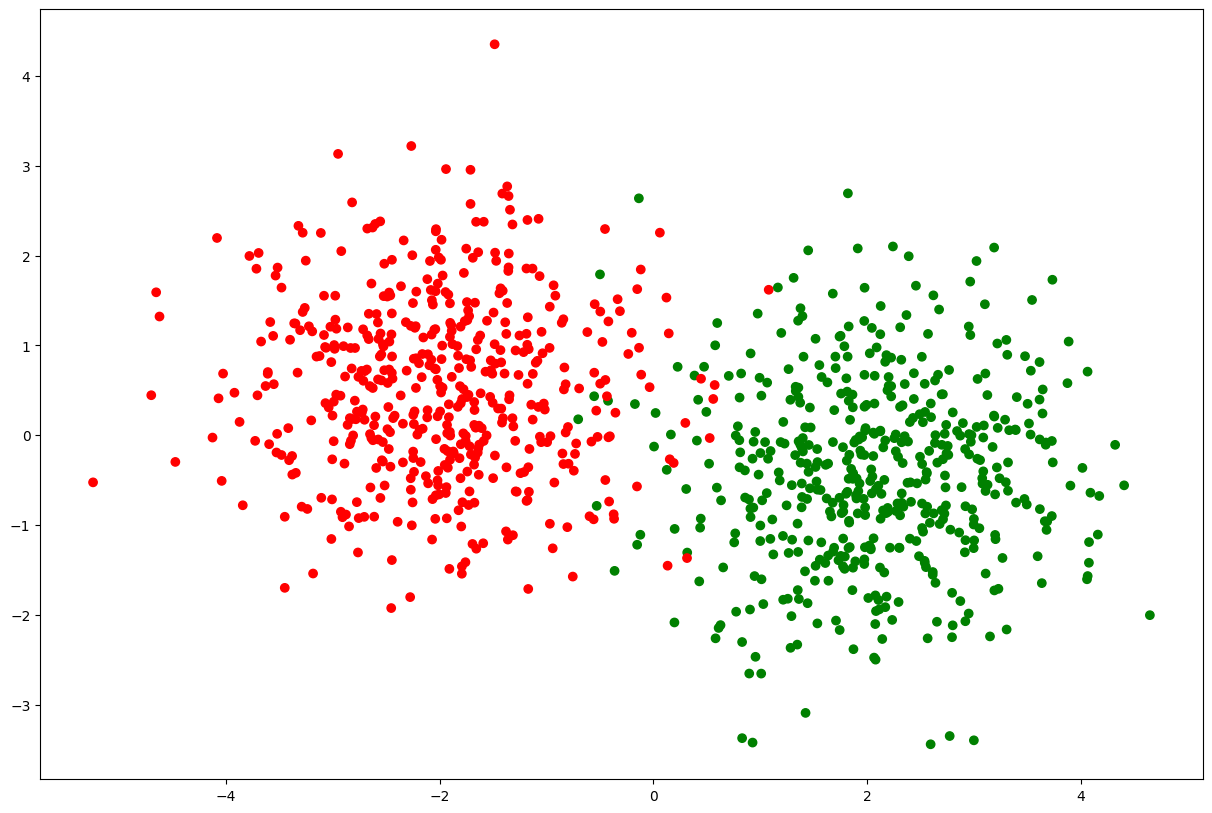

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=1000, centers=[[-2,0.5],[2,-0.5]], cluster_std=1, random_state=42)

colors = ("red", "green")
colored_y = np.zeros(y.size, dtype=str)

for i, cl in enumerate([0,1]):
    colored_y[y == cl] = str(colors[i])

plt.figure(figsize=(15,10))
plt.scatter(X[:, 0], X[:, 1], c=colored_y)
plt.show()

In [ ]:
clf = MyLogisticRegression()

clf.fit(X, y, max_iter=1000)

w = clf.get_weights()
w

array([-0.01585432,  3.35275471, -0.92309444])

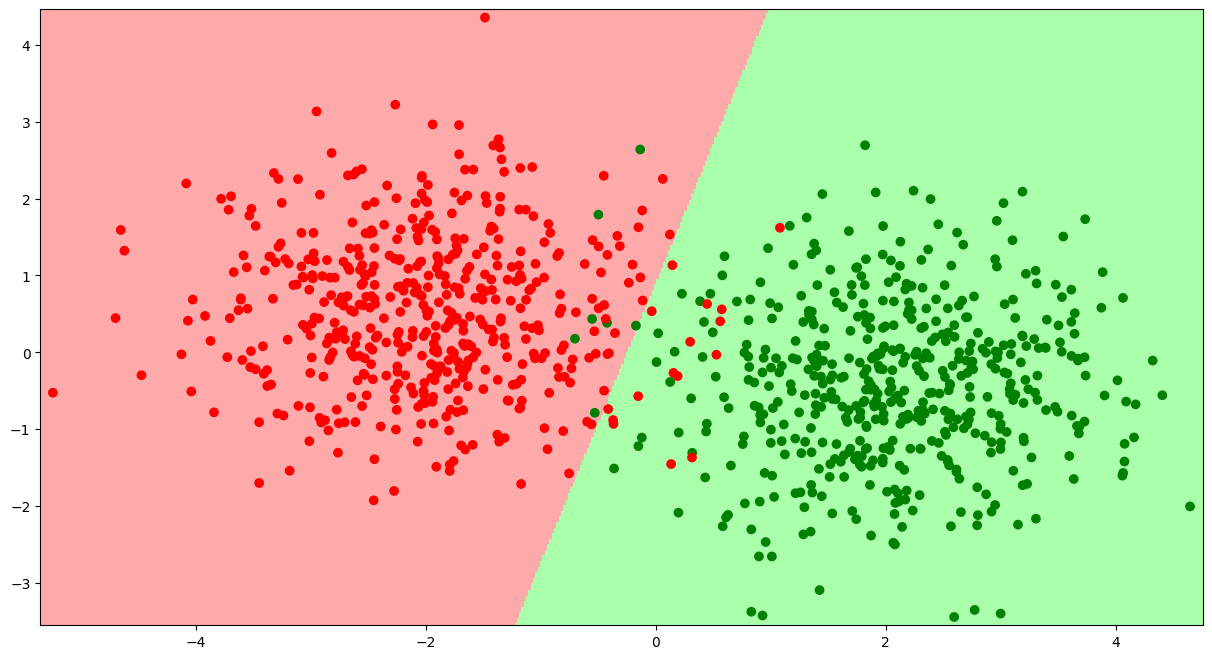

In [ ]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

plt.figure(figsize=(15,8))

eps = 0.1
xx, yy = np.meshgrid(np.linspace(np.min(X[:,0]) - eps, np.max(X[:,0]) + eps, 500),
                     np.linspace(np.min(X[:,1]) - eps, np.max(X[:,1]) + eps, 500))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

plt.scatter(X[:, 0], X[:, 1], c=colored_y)

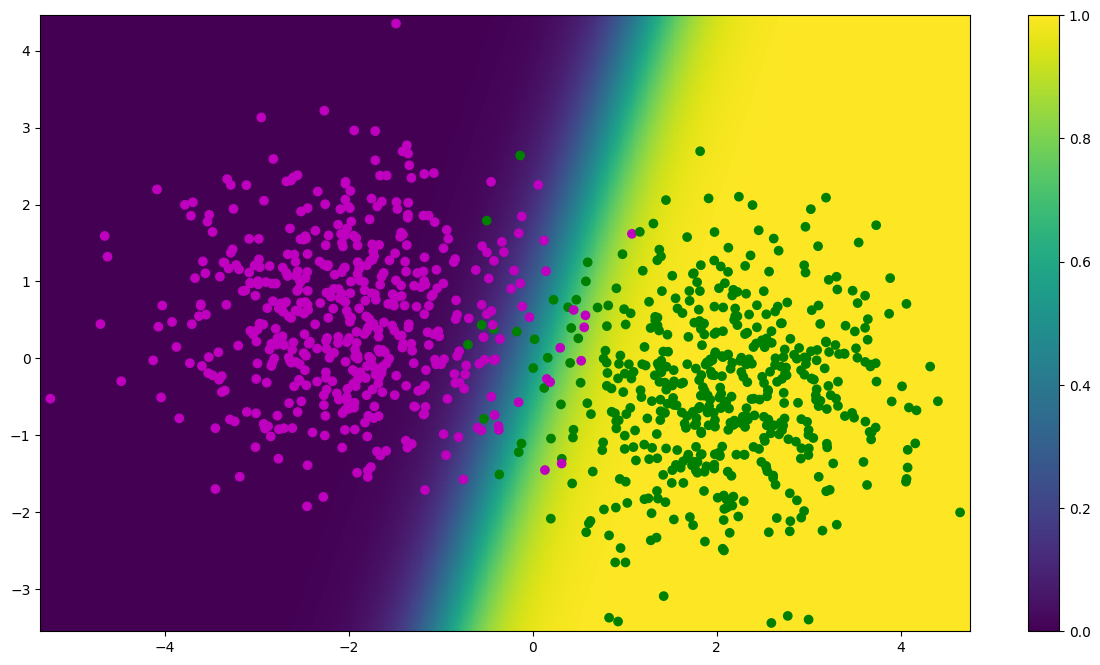

In [ ]:
colors = ("magenta", "green")
colored_y = np.zeros(y.size, dtype=str)

for i, cl in enumerate([0,1]):
    colored_y[y == cl] = str(colors[i])


plt.figure(figsize=(15,8))

Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.get_cmap('viridis'))

plt.scatter(X[:, 0], X[:, 1], c=colored_y)
plt.colorbar()
plt.show()